####

Using Scale-Invariant Feature Transform (SIFT) for matching and extracting SIFT features from two images then using them to find feature correspondences and solve for the affine transformation between them. 

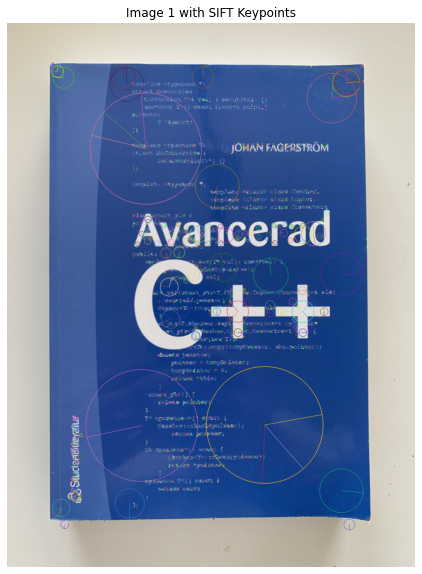

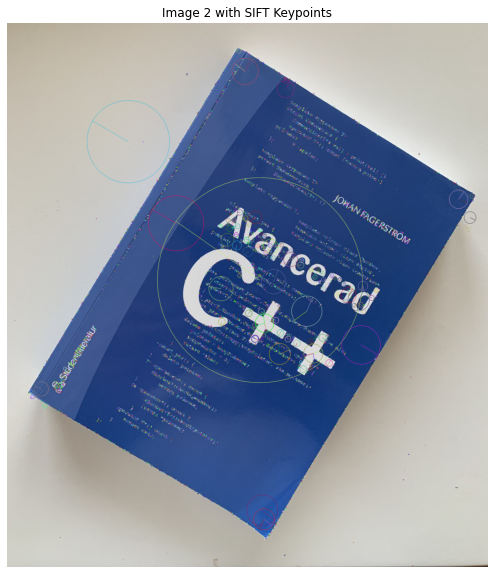

In [1]:
import cv2
import matplotlib.pyplot as plt

# Load the images
image_paths = ['book_reference.jpg', 'book_test.jpg']
images = [cv2.imread(path) for path in image_paths]

# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints_and_descriptors = [sift.detectAndCompute(image, None) for image in images]

# Visualize the detected keypoints
for i, (keypoints, descriptors) in enumerate(keypoints_and_descriptors):
    img_with_keypoints = cv2.drawKeypoints(images[i], keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
    plt.title(f'Image {i+1} with SIFT Keypoints')
    plt.axis('off')
    plt.show()


####

Compute SIFT features for the reference and test image and visualize the detected keypoints on the image.


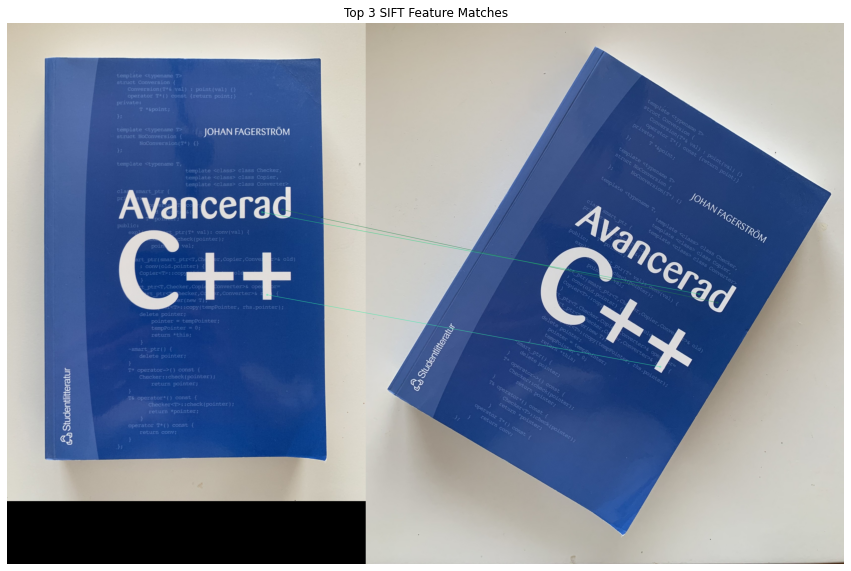

In [2]:
import cv2
import matplotlib.pyplot as plt

# Load the images
reference_img = cv2.imread('book_reference.jpg')
test_img = cv2.imread('book_test.jpg')

# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints_ref, descriptors_ref = sift.detectAndCompute(reference_img, None)
keypoints_test, descriptors_test = sift.detectAndCompute(test_img, None)

# Use BFMatcher to find the best matches
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors_ref, descriptors_test)

# Sort the matches based on their distance
matches = sorted(matches, key=lambda x: x.distance)

# Visualize the top 3 matches
top_matches = matches[:3]
img_matches = cv2.drawMatches(reference_img, keypoints_ref, test_img, keypoints_test, top_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matches
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.title('Top 3 SIFT Feature Matches')
plt.axis('off')
plt.show()


####

Solve for the affine transformation between the features in the two images and validate that the affince transformation is correct.

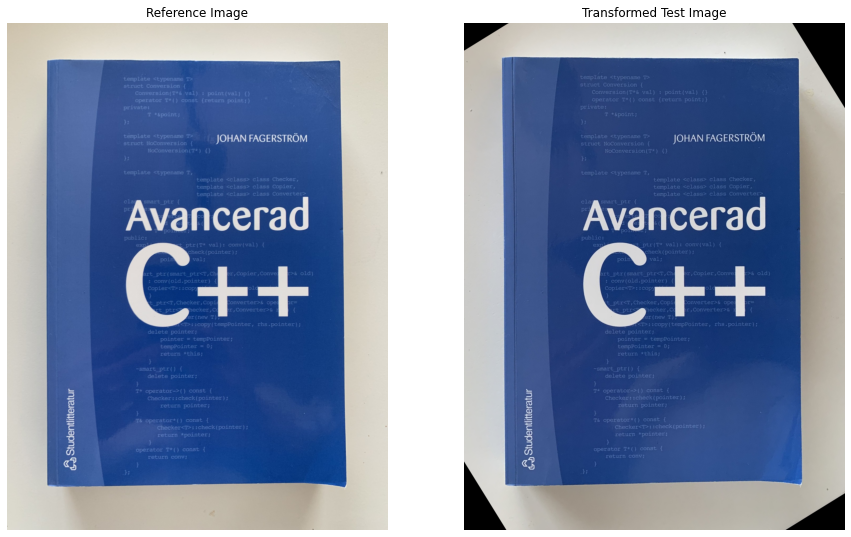

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the images
reference_img = cv2.imread('book_reference.jpg')
test_img = cv2.imread('book_test.jpg')

# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints_ref, descriptors_ref = sift.detectAndCompute(reference_img, None)
keypoints_test, descriptors_test = sift.detectAndCompute(test_img, None)

# Use BFMatcher to find the best matches
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors_ref, descriptors_test)

# Sort the matches based on their distance
matches = sorted(matches, key=lambda x: x.distance)

# Extract the coordinates of the top 3 matches
top_matches = matches[:3]
pts_ref = np.float32([keypoints_ref[m.queryIdx].pt for m in top_matches]).reshape(-1, 1, 2)
pts_test = np.float32([keypoints_test[m.trainIdx].pt for m in top_matches]).reshape(-1, 1, 2)

# Compute the affine transformation matrix
M, _ = cv2.estimateAffinePartial2D(pts_test, pts_ref)

# Apply the affine transformation to the test image
transformed_img = cv2.warpAffine(test_img, M, (reference_img.shape[1], reference_img.shape[0]))

# Visualize the transformed image
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(reference_img, cv2.COLOR_BGR2RGB))
plt.title('Reference Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(transformed_img, cv2.COLOR_BGR2RGB))
plt.title('Transformed Test Image')
plt.axis('off')

plt.show()
